# Assignment 3 - 7034, 7150

### Goals:
1. Exploring different classification models and performing tuning of their parameters.
2. Exploring different techniques for evaluating classification models.

In [9]:
!pip install -q sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Data Balancing
The dataset is class-imbalanced. So, we balance the dataset, and randomly put aside the extra readings for the gamma “g” class to make both classes equal in size.

### 2. Data Split
Then we split our dataset randomly so that the training set would form 70% of the dataset and the testing set would form 30% of it.

### 3. Data Preprocessing
As a way to make our models more accurate, we preprocessed our data with 3 different scalers: StandardScaler, QuantileTransformer, and RobustScaler.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, QuantileTransformer, RobustScaler

df = pd.read_csv('data.txt', sep=',', header=None)
features = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df.columns = features

# Data Balancing
g = df.groupby('class')
df = g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True))

# Data Splitting
dftrain, dftest = train_test_split(df, test_size=0.3)

# Popping Labels before preprocessing
y_train = dftrain.pop('class')
y_test = dftest.pop('class')

# Proving g_count and h_count are equal
g_count = 0
h_count = 0

for el in y_train:
    if el == 'g':
        g_count += 1
    else:
        h_count +=1

for el in y_test:
    if el == 'g':
        g_count += 1
    else:
        h_count +=1
        
print("G-count: " + str(g_count))
print("H-count: " + str(h_count))

G-count: 6688
H-count: 6688


<AxesSubplot:ylabel='class'>

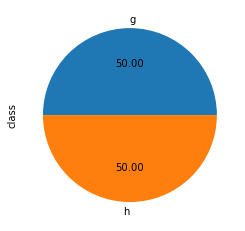

In [33]:
# Plotting counts of g & h
df['class'].value_counts().plot.pie(autopct='%.2f')

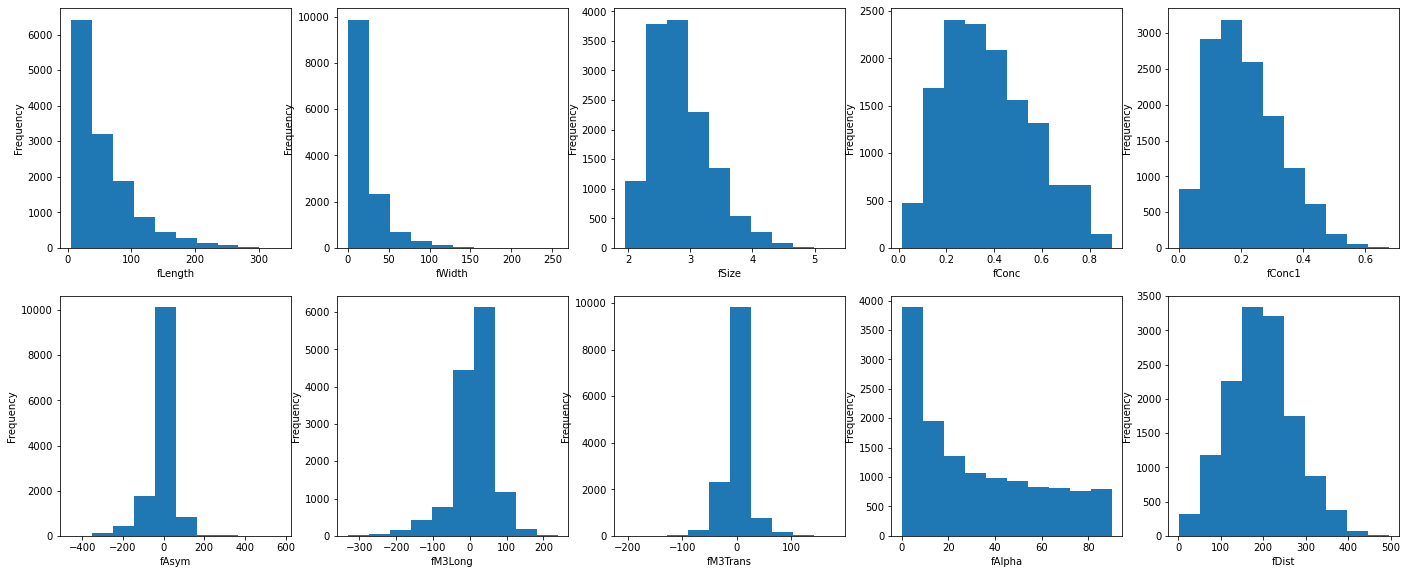

In [34]:
# Plotting histograms of each feature

fig = plt.figure(figsize=(24, 15))
for i in range(len(features)-1):
    var = features[i]
    sub = fig.add_subplot(3, 5, i + 1)
    sub.set_xlabel(var)
    df[var].plot(kind = 'hist')

In [35]:
# Data Preprocessing
# StandardScaler
dftrain_new_values = StandardScaler().fit_transform(dftrain.values)
dftest_new_values = StandardScaler().fit_transform(dftest.values)

dftrain_new_std = pd.DataFrame(dftrain_new_values, index=dftrain.index, columns=dftrain.columns)
dftest_new_std = pd.DataFrame(dftest_new_values, index=dftest.index, columns=dftest.columns)

#QuantileTransformer
dftrain_new_values = QuantileTransformer().fit_transform(dftrain.values)
dftest_new_values = QuantileTransformer().fit_transform(dftest.values)

dftrain_new_qunt = pd.DataFrame(dftrain_new_values, index=dftrain.index, columns=dftrain.columns)
dftest_new_qunt = pd.DataFrame(dftest_new_values, index=dftest.index, columns=dftest.columns)

#RobustScaler
dftrain_new_values = RobustScaler().fit_transform(dftrain.values)
dftest_new_values = RobustScaler().fit_transform(dftest.values)

dftrain_new_robst = pd.DataFrame(dftrain_new_values, index=dftrain.index, columns=dftrain.columns)
dftest_new_robst = pd.DataFrame(dftest_new_values, index=dftest.index, columns=dftest.columns)

### Scikit learn classifiers:

- Decision Trees
- Naive Bayes Classifier
- Random Forests
- AdaBoost 
- KNearest Neighbor (K-NN).

### Method:
- Using cross-validation, we tune the parameters of each classifier.
- We run each classifier 3 times, once on each set of preprocessed data using different preprocessing methods.
- We test each classifier and compare accuracies.

In [36]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

scores_prep1 = {'DecisionTree': 0, 'NaiveBayes': 0, 'RandomForest': 0, 'AdaBoost': 0, 'KNN': 0}
scores_prep2 = {'DecisionTree': 0, 'NaiveBayes': 0, 'RandomForest': 0, 'AdaBoost': 0, 'KNN': 0}
scores_prep3 = {'DecisionTree': 0, 'NaiveBayes': 0, 'RandomForest': 0, 'AdaBoost': 0, 'KNN': 0}

## Decision Trees:

In [ ]:
X_train1 = dftrain_new_std.copy()
Y_train1 = y_train.copy()

X_test1 = dftest_new_std.copy()
Y_test1 = y_test.copy()

X_train2 = dftrain_new_qunt.copy()
Y_train2 = y_train.copy()

X_test2 = dftest_new_qunt.copy()
Y_test2 = y_test.copy()

X_train3 = dftrain_new_robst.copy()
Y_train3 = y_train.copy()

X_test3 = dftest_new_robst.copy()
Y_test3 = y_test.copy()

clf1 = DecisionTreeClassifier()
clf1 = clf1.fit(X_train1, Y_train1)
score = clf1.score(X_test1, Y_test1)
scores_prep1['DecisionTree'] = score
Y_pred1 = clf1.predict(X_test1)

clf2 = DecisionTreeClassifier()
clf2 = clf2.fit(X_train2, Y_train2)
score = clf2.score(X_test2, Y_test2)
scores_prep2['DecisionTree'] = score
Y_pred2 = clf2.predict(X_test2)

clf3 = DecisionTreeClassifier()
clf3 = clf3.fit(X_train3, Y_train3)
score = clf3.score(X_test3, Y_test3)
scores_prep3['DecisionTree'] = score
Y_pred3 = clf3.predict(X_test3)

print('Classification Report')
print(classification_report(Y_test1, Y_pred1))
print('Confusion Matrix')
d = ConfusionMatrixDisplay(confusion_matrix(Y_test1, Y_pred1))
d.plot()
plt.show()



## Naive Bayes:

In [41]:
X_train1 = dftrain_new_std.copy()
Y_train1 = y_train.copy()

X_test1 = dftest_new_std.copy()
Y_test1 = y_test.copy()

X_train2 = dftrain_new_qunt.copy()
Y_train2 = y_train.copy()

X_test2 = dftest_new_qunt.copy()
Y_test2 = y_test.copy()

X_train3 = dftrain_new_robst.copy()
Y_train3 = y_train.copy()

X_test3 = dftest_new_robst.copy()
Y_test3 = y_test.copy()


clf1 = GaussianNB()
clf1 = clf1.fit(X_train1, Y_train1)
score = clf1.score(X_test1, Y_test1)
scores_prep1['NaiveBayes'] = score
Y_pred1 = clf1.predict(X_test1)

clf2 = GaussianNB()
clf2 = clf2.fit(X_train2, Y_train2)
score = clf2.score(X_test2, Y_test2)
scores_prep2['NaiveBayes'] = score
Y_pred2 = clf3.predict(X_test2)

clf3 = GaussianNB()
clf3 = clf3.fit(X_train3, Y_train3)
score = clf3.score(X_test3, Y_test3)
scores_prep3['NaiveBayes'] = score
Y_pred3 = clf3.predict(X_test3)

## Ada Boost:

In [42]:
X_train1 = dftrain_new_std.copy()
Y_train1 = y_train.copy()

X_test1 = dftest_new_std.copy()
Y_test1 = y_test.copy()

X_train2 = dftrain_new_qunt.copy()
Y_train2 = y_train.copy()

X_test2 = dftest_new_qunt.copy()
Y_test2 = y_test.copy()

X_train3 = dftrain_new_robst.copy()
Y_train3 = y_train.copy()

X_test3 = dftest_new_robst.copy()
Y_test3 = y_test.copy()


clf1 = AdaBoostClassifier(n_estimators=100)
clf1 = clf1.fit(X_train1, Y_train1)
score = clf1.score(X_test1, Y_test1)
scores_prep1['AdaBoost'] = score

clf2 = AdaBoostClassifier(n_estimators=100)
clf2 = clf2.fit(X_train2, Y_train2)
score = clf2.score(X_test2, Y_test2)
scores_prep2['AdaBoost'] = score

clf3 = AdaBoostClassifier(n_estimators=100)
clf3 = clf3.fit(X_train3, Y_train3)
score = clf3.score(X_test3, Y_test3)
scores_prep3['AdaBoost'] = score

## Random Forest:

In [43]:
X_train1 = dftrain_new_std.copy()
Y_train1 = y_train.copy()

X_test1 = dftest_new_std.copy()
Y_test1 = y_test.copy()

X_train2 = dftrain_new_qunt.copy()
Y_train2 = y_train.copy()

X_test2 = dftest_new_qunt.copy()
Y_test2 = y_test.copy()

X_train3 = dftrain_new_robst.copy()
Y_train3 = y_train.copy()

X_test3 = dftest_new_robst.copy()
Y_test3 = y_test.copy()


clf1 = RandomForestClassifier(n_estimators=100)
clf1 = clf1.fit(X_train1, Y_train1)
score = clf1.score(X_test1, Y_test1)
scores_prep1['RandomForest'] = score

clf2 = RandomForestClassifier(n_estimators=100)
clf2 = clf2.fit(X_train2, Y_train2)
score = clf2.score(X_test2, Y_test2)
scores_prep2['RandomForest'] = score

clf3 = RandomForestClassifier(n_estimators=100)
clf3 = clf3.fit(X_train3, Y_train3)
score = clf3.score(X_test3, Y_test3)
scores_prep3['RandomForest'] = score

## K Nearest Neighbours:

In [44]:
X_train1 = dftrain_new_std.copy()
Y_train1 = y_train.copy()

X_test1 = dftest_new_std.copy()
Y_test1 = y_test.copy()

X_train2 = dftrain_new_qunt.copy()
Y_train2 = y_train.copy()

X_test2 = dftest_new_qunt.copy()
Y_test2 = y_test.copy()

X_train3 = dftrain_new_robst.copy()
Y_train3 = y_train.copy()

X_test3 = dftest_new_robst.copy()
Y_test3 = y_test.copy()


clf1 =  KNeighborsClassifier(20)
clf1 = clf1.fit(X_train1, Y_train1)
score = clf1.score(X_test1, Y_test1)
scores_prep1['KNN'] = score

clf2 =  KNeighborsClassifier(20)
clf2 = clf2.fit(X_train2, Y_train2)
score = clf2.score(X_test2, Y_test2)
scores_prep2['KNN'] = score

clf3 =  KNeighborsClassifier(20)
clf3 = clf3.fit(X_train3, Y_train3)
score = clf3.score(X_test3, Y_test3)
scores_prep3['KNN'] = score

## Accuracy Scores:

In [45]:
print("Accuracy using StandardScaler: " + str(scores_prep1))
print("Accuracy using QuantileTransformer: " + str(scores_prep2))
print("Accuracy using RobustScaler: " + str(scores_prep3))

Accuracy using StandardScaler: {'DecisionTree': 0.7824570147022178, 'NaiveBayes': 0.6501370545726389, 'RandomForest': 0.8534762023423872, 'AdaBoost': 0.8153501121355594, 'KNN': 0.8101171193620733}
Accuracy using QuantileTransformer: {'DecisionTree': 0.7787191627211563, 'NaiveBayes': 0.7488163468726639, 'RandomForest': 0.855968103663095, 'AdaBoost': 0.8218290555693994, 'KNN': 0.819087964116621}
Accuracy using RobustScaler: {'DecisionTree': 0.7767256416645901, 'NaiveBayes': 0.6491402940443558, 'RandomForest': 0.8547221530027411, 'AdaBoost': 0.8138549713431348, 'KNN': 0.8078744081734364}
